Now trying SU(3).

In [1]:
import numpy as np
import pandas as pd

# Setup plotting with matplotlib
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
## setup latex plotting
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
## make font size bigger
matplotlib.rcParams.update({'font.size': 16})
## but make legend smaller
matplotlib.rcParams.update({'legend.fontsize': 14})
## change line thickness
matplotlib.rcParams.update({'lines.linewidth' : 1.75})

# SKLearn
from sklearn.manifold import TSNE

# Tensorflow Keras
# from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import tensorflow.keras.metrics as metrics
import tensorflow.keras.losses as losses
from tensorflow import one_hot 

from keras import backend as K
import tensorflow as tf

In [2]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


n_components = np.arange(0, 8, 1)  # options for n_components

def compute_scores(X):
    pca = PCA(svd_solver='full')
    pca_scores = []
    for n in n_components:
        pca.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
    return pca_scores 

def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X))


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Useful to find random orthogonal vectors
def find_orth(O):
    rand_vec = np.random.rand(O.shape[0], 1)
    A = np.hstack((O, rand_vec))
    b = np.zeros(O.shape[1] + 1)
    b[-1] = 1
    return np.linalg.lstsq(A.T, b)[0]

In [3]:
import random

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
liststrucSU3 = np.array([[1,2,3,1],[1,4,7,.5],[1,5,6,-.5],[2,4,6,.5],[2,5,7,.5],[3,4,5,.5],[3,6,7,-.5],[4,5,8,3**0.5/2],[6,7,8,3**0.5/2]])
liststrucSU2 = np.array([[1,2,3,1],[3,2,1,1]])

def adjointSUN(dim,liststruc):
    dimSUN=dim**2-1
#     admat = np.zeros((8,8,8))
    admat = np.zeros((dimSUN,dimSUN,dimSUN))
    for i in range(liststruc.shape[0]):
        strucc = liststruc[i]
        strucc1 = int(strucc[0])-1
        strucc2 = int(strucc[1])-1
        strucc3 = int(strucc[2])-1
        admat[strucc1,strucc2,strucc3]=strucc[3]
        admat[strucc1,strucc3,strucc2]=-strucc[3]
        admat[strucc3,strucc1,strucc2]=strucc[3]
        admat[strucc3,strucc2,strucc1]=-strucc[3]
        admat[strucc2,strucc3,strucc1]=strucc[3]
        admat[strucc2,strucc1,strucc3]=-strucc[3]
    return admat

adjointSU3 = adjointSUN(3,liststrucSU3)

In [4]:
# for i in range(8):
#     matprint(adjointSU3[i])
#     print("")

## Create training set 

In [10]:
import random
import numpy as np
import scipy as sp
import chirallag as cL

N=3
gens = cL.gen_gellman(3)
F0 = 1

numpoints=100000

pirandbase=2+2*np.random.rand(8)
# pirandbase=3
pishift= np.random.rand(8)
random_pis = np.zeros((numpoints,8))
random_dpis = np.zeros((numpoints,8))

i = 0

while i < numpoints:
    newpi = np.random.rand(8)
    newdpi = (np.random.rand(8))
    if  np.mean(np.abs(newpi)) < 9:
        random_pis[i] = np.abs(newpi)**0.25
        random_dpis[i] = np.abs(newdpi)**0.25
        i += 1
    continue
    

potvals = np.reshape(np.real(cL.get_V(random_pis,random_dpis,gens,F0)),(-1,1))

# potvals.shape
output = np.hstack((random_dpis,random_pis,potvals))

In [11]:
Xs = output[:,0:-1]
Ys = (-output[:,-1])
np.savetxt('../testing_data_2.csv',output,delimiter= ',')

In [7]:
fig, axs = plt.subplots(1,figsize=(15,5))
fig.tight_layout()
axs.hist(Ys,bins=50)
fig.tight_layout()

RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1080x360 with 1 Axes>

In [ ]:
np.savetxt("nonmombasis2.csv", output, delimiter=",")

In [ ]:
# np.savetxt("nonmombasis2.csv", output, delimiter=",")

In [ ]:
import pandas as pd
df_pions = pd.read_csv(r'nonmombasis2.csv')
# print(df_pions[:5])

output = df_pions.values
output.shape

(99999, 17)

In [ ]:
Xs = output[:,0:-1]
# Ys = (-output[:,-1])**0.25
Ys = (-output[:,-1])

# Xs = Xs[Ys<3]
# Ys = Ys[Ys<3]

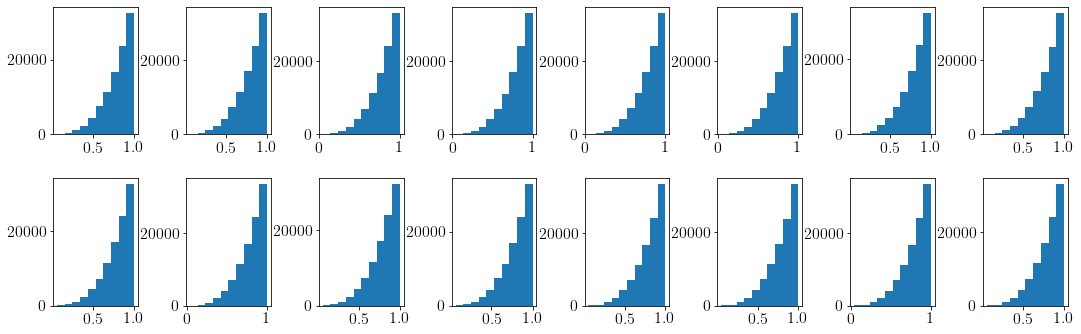

In [ ]:
fig, axs = plt.subplots(2,8,figsize=(15,5))
fig.tight_layout()

for i in range(8):
    n, bins, patches = axs[0,i].hist(Xs[:,i],bins=10)
    n, bins, patches = axs[1,i].hist(Xs[:,i+8],bins=10)

In [ ]:
Xs[:,:8].shape

(99999, 8)

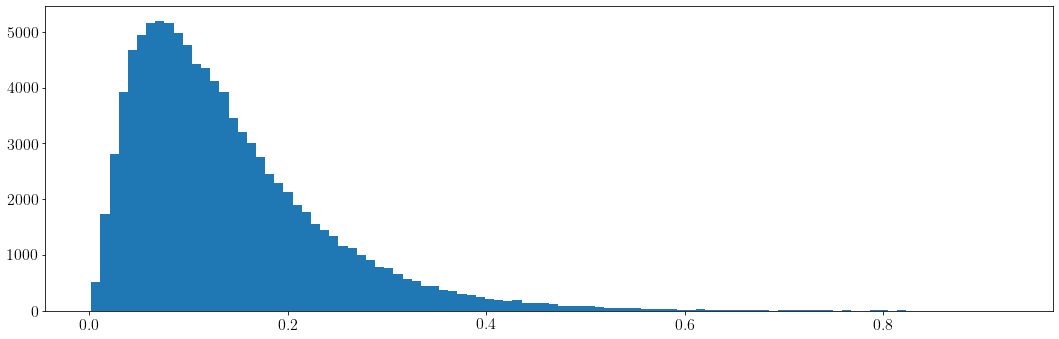

In [ ]:
fig, axs = plt.subplots(1,figsize=(15,5))
fig.tight_layout()
# axs.xscale('log')
axs.hist(Ys,bins=100)
fig.tight_layout()

# Setting up the NN 

In [ ]:
from IPython.display import clear_output
import ipywidgets as widgets

from tensorflow import keras
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras import layers

# Build in an automatic stop when no improvement is found, restore to best weights
callbackearlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', baseline=None, patience=10, restore_best_weights = True)


class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    
    """
        
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
        

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        
        out = widgets.Output(layout={'border': '1px solid black'})
        clear_output(wait=True)
        
        with out:
            for i, metric in enumerate(metrics):
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics[metric], 
                            label=metric
                           )
                axs[i].set_yscale('log')
                if logs['val_' + metric]:
                    axs[i].plot(range(1, epoch + 2),
                                self.metrics['val_' + metric], 
    #                             label='val_' + metric
                               )

                axs[i].legend()
#                 axs[i].grid()
                axs[i].grid(b=True, which='major', linestyle='-')
                axs[i].grid(b=True, which='minor', linestyle='--')

            for i, metric in enumerate(metrics):
                print("")
                print(self.metrics[metric][-1])

            
        plt.tight_layout()
        plt.show()

        
rlop = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=.2,
    patience=5,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)
        
callbacks_list = [PlotLearning(),rlop]

In [ ]:
# initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')
initializer = 'normal'
# initializer = tf.keras.initializers.Zeros()
activ = 'relu'
activ = 'elu'
activ = tf.keras.layers.LeakyReLU(alpha=0.05)
regu = regularizers.l1_l2(l1=1e-5, l2=1e-5)

Xsnew = Xs[:,:]
Ysnew = Ys[:]

inputs=tf.keras.Input(shape=Xsnew.shape[1])
x = tf.keras.layers.Dense(500, input_dim=Xsnew.shape[1], activation=activ, kernel_initializer=initializer)(inputs)
# x = layers.Dropout(0.25)(x)
for i in range(8):
    x = tf.keras.layers.Dense(500, activation=activ, kernel_initializer=initializer)(x)
# x = tf.keras.layers.Dense(80, activation=activ, kernel_initializer=initializer, kernel_regularizer=regu)(x)
# outputs = tf.keras.layers.Dense(1, activation='relu')(x) # use this for without one hot encoding
outputs = tf.keras.layers.Dense(1, activation=activ)(x) # use this for without one hot encoding
modelrandom = tf.keras.Model(inputs=inputs,outputs=outputs)

modelrandom.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_26 (Dense)             (None, 500)               8500      
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_28 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_29 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_31 (Dense)             (None, 500)               2505

# Training

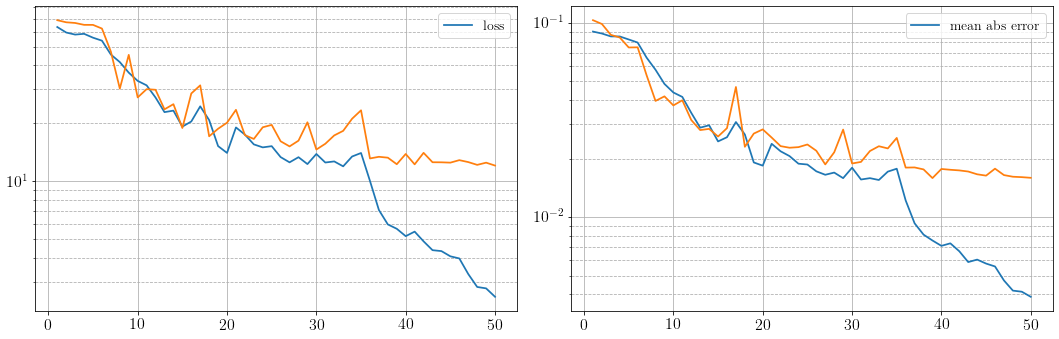

In [ ]:
from sklearn.model_selection import train_test_split

# Without one hot encoding
sgdopt=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=.1, nesterov=True, name='SGD')
adamopt=tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=.99, epsilon=1e-8, amsgrad=False)
opt=adamopt

import tensorflow.keras.backend as kb

def custom_loss(y_actual,y_pred):
    delta=2
    delta2=1
    eps=1e-5
    yp=kb.pow(eps+y_pred,delta)
    yt=kb.pow(eps+y_actual,delta)
#     custom_loss = delta**(-1)*((yp- yt*kb.log(yp)) - (yt- yt*kb.log(yt)))
    custom_loss = 0.1*((yp- yt*kb.log(yp)) - (yt- yt*kb.log(yt))) + kb.abs(y_pred-y_actual)
#     custom_loss = kb.square(y_pred-y_actual) 
    return custom_loss


Xsnew = Xs[:1000] 
Ysnew = Ys[:1000] 

loss1 = 'mape'
# loss1 = custom_loss
modelrandom.compile(optimizer=opt,loss=loss1,metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean abs error')],run_eagerly=False)
modelrandom.fit(Xsnew,Ysnew,epochs=50,batch_size=16,validation_split = 0.1,verbose=0,use_multiprocessing=True, callbacks=callbacks_list)



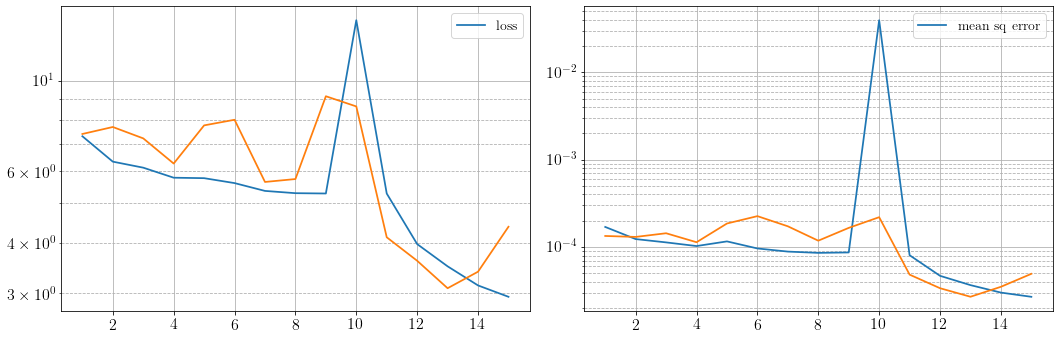

In [ ]:
# Take out 10% of the data to use as a validation set which is never touched
Xsnew = Xs[:90000] 
Ysnew = Ys[:90000]

rlop = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=.5,
    patience=3,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)
        
callbacks_list = [PlotLearning(),rlop]

# Looping over larger learning rate in an attempt to kick the NN out of false vacua 
for i in range(10):
    
    print(i)

    adamopt=tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.6, beta_2=.99, epsilon=1e-8, amsgrad=True)
    opt=adamopt

    loss1 = 'mape'
#     valsplit=0.05+0.05*random.randint(0, 5)
    valsplit=0.2

    modelrandom.compile(optimizer=
                        opt,loss=loss1,metrics=[tf.keras.metrics.MeanSquaredError(name='mean sq error')],
                        run_eagerly=False)

    hist=modelrandom.fit(Xsnew,Ysnew,epochs=25,batch_size=100,validation_split = 
                    valsplit, shuffle = True, verbose=0,use_multiprocessing=True, callbacks=callbacks_list)
    

In [ ]:
N=3
gens = cL.gen_gellman(3)
F0 = 1

Xstest= Xs[90000:]
dpi_test = Xs[90000:,:8]
pi_test = Xs[90000:,8:]

orig_V_test = np.abs(cL.get_V(pi_test,dpi_test,gens,F0).real)
orig_V_NN_test = np.abs(modelrandom.predict(np.hstack((pi_test,dpi_test))).squeeze())
preddiff_test = (orig_V_test - orig_V_NN_test)/orig_V

testmape = np.mean(np.abs(preddiff_test))*100
print(testmape)

# Testing

## Different epses 

In [ ]:
# To do, make these work when not supplying stacks of epsilon and transformations.

def get_SO_trans(eps,N,normalise=False):
    ''' Produces 'infinitesimal' transformation matrices for SO(N) given epsilon.
        Epsilon is size of transformation and should be a numpy array of dimension 1.
        N must be larger than 1.
    '''
    
    trans_number = len(eps) 
    # Generate rotation matrices
    SO_samp = np.zeros((trans_number,N,N))

    # Set random off diagonal element of each matrix to one (surely must be a better way to do this)
    poss_inds = range(N)
    SO_inds = [random.sample(poss_inds,2) for i in range(trans_number)]
    SO_indsflat = [i*(N)**2+x*(N)+y for i,(x,y) in enumerate(SO_inds)]
    SO_samp.flat[SO_indsflat] += 1

    # Is this transpose faster than repeating assignment above?
    SO_samp = SO_samp - np.transpose(SO_samp,axes=[0,2,1])
    SO_trans = np.identity(N) + eps[:,None,None]*SO_samp
    # Normalise so that det = 1
    if normalise:
        norm = np.power(np.linalg.det(SO_trans),-1/(N))
        SO_trans = norm[:,None,None]*SO_trans
    return SO_trans
  
def get_SU_trans(eps,N,liststruct,normalise=False):
    ''' Produces 'infinitesimal' transformation matrices for SU(N) given epsilon.
        Epsilon is size of transformation and should be a numpy array of dimension 1.
        N must be larger than 1.
        Calls adjointSUN which requires liststruct
    '''
    adjointSU = adjointSUN(N,liststruct)
    
    genno=np.random.randint(0,N*N-2,number_predictions)
    SU_trans = np.identity(N*N-1)+eps[:,None,None]*adjointSU[genno]
    # Normalise so that det = 1
    if normalise:
        norm = np.power(np.linalg.det(SU_trans),-1/(N*N-1))
        SU_trans = norm[:,None,None]*SU_trans
    return SU_trans
    
def apply_trans(trans,vec):
    ''' Apply transformation trans to vector. Assumes both trans and vec are stacks.'''
    trans_vec=np.matmul(trans,vec[:,:,None]).squeeze()
    return trans_vec

In [ ]:
%%time
# Compare Transformations
epsmax = 1
epsmin = 5e-2
eps_intervals=20
number_predictions=10000

N=3
gens = cL.gen_gellman(3)
F0 = 1

pi=np.zeros((number_predictions,8))
dpi=np.zeros((number_predictions,8))
for i in range(number_predictions):
    newxs = Xstest
    lenxs= (Xstest.shape)[0]-1
    random_vector = newxs[random.randint(0, lenxs),:] 
    pi[i]=random_vector[8:] 
    dpi[i]=random_vector[:8]


# Get epsilons, create copies
eps_vals=np.logspace(np.log10(epsmin),np.log10(epsmax),num=eps_intervals)
eps = np.zeros(number_predictions)
for i,val in enumerate(eps_vals): 
    eps[i*int(number_predictions/eps_intervals):(i+1)*int(number_predictions/eps_intervals)] = val
# Set leftovers to max value
eps[(i+1)*int(number_predictions/eps_intervals):]=val

# SO(N) transformations
SO_trans = get_SO_trans(eps,N*N-1,normalise=False)
SO_pi = apply_trans(SO_trans,pi)
SO_dpi = apply_trans(SO_trans,dpi)

# SU(N) transformations

SU_trans = get_SU_trans(eps,N,liststrucSU3,normalise=False)
SU_pi = apply_trans(SU_trans,pi)
SU_dpi = apply_trans(SU_trans,dpi)


# Get potential values, only care about real part (non zero imag should just be numerical precision errors)

orig_V = np.abs(cL.get_V(pi,dpi,gens,F0).real)
SO_V = np.abs(cL.get_V(SO_pi,SO_dpi,gens,F0).real)
SU_V = np.abs(cL.get_V(SU_pi,SU_dpi,gens,F0).real)

SO_Vdiff_rel = (SO_V - orig_V)/orig_V
SU_Vdiff_rel = (SU_V - orig_V)/orig_V

SO_V_NN = np.abs(modelrandom.predict(np.hstack((SO_dpi,SO_pi))))
SU_V_NN = np.abs(modelrandom.predict(np.hstack((SU_dpi,SU_pi))))

orig_V_NN = np.abs(modelrandom.predict(np.hstack((pi,dpi))).squeeze())
SO_V_NN_diff = (SO_V_NN.squeeze() - orig_V)/orig_V
SU_V_NN_diff = (SU_V_NN.squeeze() - orig_V)/orig_V
# SO_V_NN_diff = (SO_V_NN.squeeze() - orig_V_NN)/orig_V_NN
# SU_V_NN_diff = (SU_V_NN.squeeze() - orig_V_NN)/orig_V_NN

preddiff = orig_V - orig_V_NN

rand_means = np.mean(np.hstack([np.abs(pi) , np.abs(dpi)]),axis=-1)

In [ ]:
preddiff.shape
orig_V_NN.shape

In [ ]:
SO_V_NN_diff[np.abs(preddiff)<0.001].shape

In [ ]:
fig,ax = plt.subplots(1,figsize=(12,8))

ax.scatter(eps[np.abs(preddiff)<0.001],np.abs(SU_V_NN_diff[np.abs(preddiff)<0.001]),color="red", alpha=0.1)
ax.scatter(eps[np.abs(preddiff)<0.001],np.abs(SO_V_NN_diff[np.abs(preddiff)<0.001]),color="blue", alpha=0.1)


# ax.scatter(eps,np.abs(SO_Vdiff_rel),color="red", alpha=0.1)
# ax.scatter(eps,np.abs(SU_Vdiff_rel),color="blue", alpha=0.1)

# ax.scatter(epses,np.abs(su2transVdiffs),color="khaki", alpha=0.1)
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\Delta V$')
ax.set_xscale('log')
ax.set_yscale('log')

x = np.logspace(-1.5,0.,20)
y1 = np.exp(x)-(1+x)
y = 1/(1-x)-(1)
ax.plot(x,y,color="green",linestyle='--',label='resummed above eps')
ax.plot(x,x,color="green",linestyle='dotted',label='eps')
ax.plot(x,y1,color="black",linestyle='--',label='resummed above eps**2')
ax.plot(x,x**2,color="black",linestyle='dotted',label='eps**2')

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.legend()
fig.tight_layout()
# fig.savefig('DeltaV.png',dpi=200,transparent=False)

In [ ]:
fig = plt.figure(figsize=(12,8))

transeps_NN=np.column_stack(((np.log10(eps[np.abs(preddiff)<0.001])),
                          (np.log10(np.abs(SU_V_NN_diff[np.abs(preddiff)<0.001]))),
                          (np.log10(np.abs(SO_V_NN_diff[np.abs(preddiff)<0.001])))))
transeps=np.column_stack(((np.log10(eps)),
                          (np.log10(np.abs(SU_Vdiff_rel))),
                          (np.log10(np.abs(SO_Vdiff_rel)))))
transeps_diff=np.column_stack(((np.log10(eps)),
                          (np.log10(np.abs(np.abs(SU_V_NN_diff)-np.abs(SU_Vdiff_rel)))),
                          (np.log10(np.abs(np.abs(SO_V_NN_diff)-np.abs(SO_Vdiff_rel))))))
dfepses_NN = pd.DataFrame(data=transeps_NN, columns=["eps", "su3NN", "so8NN"])
dfepses = pd.DataFrame(data=transeps, columns=["eps", "su3", "so8"])
dfepses_diff = pd.DataFrame(data=transeps_diff, columns=["eps", "su3_diff", "so8_diff"])
sb.lineplot(data=dfepses_NN, x="eps", y="su3NN")
sb.lineplot(data=dfepses_NN, x="eps", y="so8NN")
sb.lineplot(data=dfepses, x="eps", y="su3")
sb.lineplot(data=dfepses, x="eps", y="so8")
# sb.lineplot(data=dfepses_diff, x="eps", y="su3_diff")
# sb.lineplot(data=dfepses_diff, x="eps", y="so8_diff")
plt.legend(title='', loc='lower right', labels=['su3 NN', 'so8 NN','su3','so8'
#                                                 ,'su3 diff','so8 diff'
                                               ])
plt.grid()
plt.xlabel(r'$\log_{10}\epsilon$', fontsize = 20)
plt.ylabel(r'$\log_{10}\Delta V$', fontsize = 20)

x = np.linspace(-1.3,0.,100)
# lastlossx= np.log10((hist.history)['val_loss'][-1]*0.01)+0*x
lastlossx=np.log10(testmape*0.01)+0*x
plt.plot(x,lastlossx,color="red",linestyle='-',label='loss')

# resummed geometric series 
y1 = np.log10(1/(1-10**x)-(1+10**x))
y = np.log10(1/(1-10**x)-(1))-1.4
# y = np.log10(np.exp(10**x)-1)-1.2
plt.plot(x,y,color="green",linestyle='--',label='resummed above eps')
plt.plot(x,x,color="green",linestyle='dotted',label='eps')
plt.plot(x,y1,color="black",linestyle='--',label='resummed above eps**2')
plt.plot(x,2*x,color="black",linestyle='dotted',label='eps**2')

In [ ]:
fig = plt.figure(figsize=(12,8))

transeps_NN=np.column_stack(((np.log10(eps[np.abs(preddiff)<0.001])),
                          (np.log10(np.abs(SU_V_NN_diff[np.abs(preddiff)<0.001]))),
                          (np.log10(np.abs(SO_V_NN_diff[np.abs(preddiff)<0.001])))))
dfepses_NN = pd.DataFrame(data=transeps_NN, columns=["eps", "su3NN", "so8NN"])
sb.lineplot(data=dfepses_NN, x="eps", y="su3NN")
sb.lineplot(data=dfepses_NN, x="eps", y="so8NN")
plt.legend(title='', loc='upper left', labels=['SU(3)', 'SO(8)'
                                               ], fontsize = 30)
plt.grid()
plt.xlabel(r'$\log_{10}\epsilon$', fontsize = 30)
plt.ylabel(r'$\log_{10}\Delta V_{\rm NN}$', fontsize = 30)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)


plt.plot(x,lastlossx,color="red",linestyle='-',label='loss')
plt.plot(x,x-.6,color="green",linestyle='dotted',label='eps')
plt.plot(x,2*x,color="black",linestyle='dotted',label='eps**2')

## Checking error in terms of fields 

In [ ]:

number_predictions=1000

random_Vs=np.zeros(number_predictions)
# truth_random_Vs=np.zeros(number_predictions)
# diff_Vs=np.zeros(number_predictions)
randvecs=np.zeros((number_predictions,16))
randmeans=np.zeros(number_predictions)

for i in range(number_predictions):
    
    print(i)
    clear_output(wait=True)
    
#     eps=10**(round(2*(-1.*random.random()+0.25),1))
    random_vector = Xs[random.randint(0, 10000),:]
#     random_vector = df_pions_array[random.randint(0, 10000),0:-2]


    randvecs[i]=random_vector
    randmeans[i]=np.mean(np.abs(random_vector))

    
randvecs[:,2:]=1

truth_random_V = cL.get_V(randvecs[:,8:],randvecs[:,:8],gens,F0)
# random_vector=np.reshape(randvecs,(1,-1))
random_V = (modelrandom.predict(randvecs))
# diff_Vs = -(random_V.squeeze() - truth_random_V.real)/(truth_random_V.real)
diff_Vs = -(random_V.squeeze() - truth_random_V.real)


print("Average potential value: ",np.mean(np.abs(transVs)),", average pion value:",np.mean(randmeans))

Average potential value:  0.11334166320646182 , average pion value: 0.8270069701575798


In [ ]:
random_V.shape
# truth_random_V.shape
randvecs[:,1].shape

(1000,)

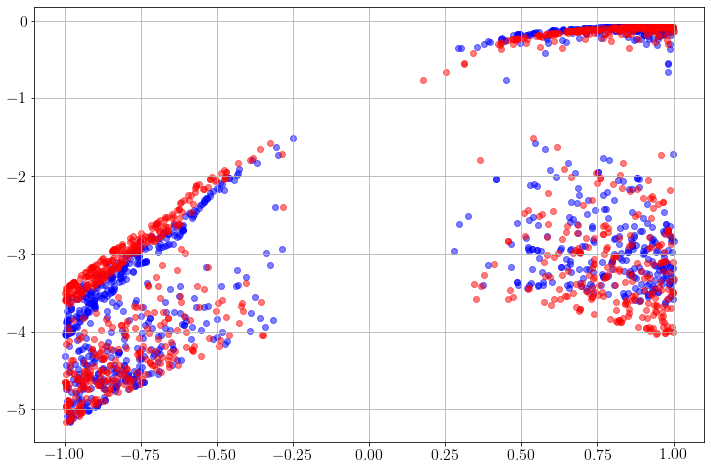

In [ ]:
fig,ax = plt.subplots(1,figsize=(12,8))
# ax.scatter(randmeans,diff_Vs,color="red", alpha=0.5)
ax.scatter(randvecs[:,0],diff_Vs,color="blue", alpha=0.5)
ax.scatter(randvecs[:,1],diff_Vs,color="red", alpha=0.5)

# plt.ylim(-2,1)
# plt.yscale('log')
# plt.xscale('log')
plt.grid()

In [ ]:
cL.get_V(np.ones(8),np.ones(8),gens,F0)

0j

# Old stuff

In [ ]:
# %%writefile getpot.py

# import random
# import numpy as np
# import scipy as sp
# import chirallag as cL

# N=3
# gens = cL.gen_gellman(3)
# F0 = 1

# pirandbase=1+1*np.random.rand(8)
    

# def getpotential(i):
#     sp.random.seed()
#     random_pi = -pirandbase*0.5+pirandbase*np.random.rand(8)
#     random_dpi = random_pi*(-1+2*np.random.normal(0,.1,8))

#     potval = np.real(cL.get_V(random_pi,random_dpi,gens,F0))
    
#     outp = np.hstack((random_dpi,random_pi,potval))
    
#     return outp

In [ ]:
# import multiprocess as mp
# from multiprocess import Pool
# from tqdm import tqdm

# import importlib
# import loopygens 
# import getpot
# importlib.reload(getpot)
# from getpot import getpotential

# numit=10
# number_predictions=100000


# # frames_list = [cloudinput] * number_predictions
# frames_list = [17] *number_predictions


# len(frames_list)

# max_pool = mp.cpu_count() 
# # max_pool = 1

# with Pool(max_pool) as p:
#     pool_outputs = list(
#         tqdm(
#             p.imap(getpotential,
#                    frames_list),
#             total=len(frames_list)
#         )
#     )    

    
    
# output=np.array(pool_outputs)


## Trying to find the other nonzero element of a generator 

In [ ]:
eps=0.1
number_predictions=50

transVs=np.zeros(number_predictions)
transVdiffs=np.zeros(number_predictions)
randvecs=np.zeros((number_predictions,16))
randmeans=np.zeros(number_predictions)
Vtrans=np.zeros((8,8))

#     Random matrix
mat0=np.zeros((8,8))


numgen=1
nonzerogen=np.transpose(np.nonzero(adjointSU3[numgen-1]))
    
mat0[nonzerogen[0,0],nonzerogen[0,1]]=adjointSU3[numgen-1][nonzerogen[0,0],nonzerogen[0,1]]
mat0[nonzerogen[1,0],nonzerogen[1,1]]=adjointSU3[numgen-1][nonzerogen[1,0],nonzerogen[1,1]]
mat0[nonzerogen[2,0],nonzerogen[2,1]]=adjointSU3[numgen-1][nonzerogen[2,0],nonzerogen[2,1]]
mat0[nonzerogen[2,1],nonzerogen[2,0]]=-mat0[nonzerogen[2,0],nonzerogen[2,1]]


for i in range(number_predictions):
    
    random_vector = np.random.rand(16)

    for ii in range(8):

        for iii in range(ii):
            
            mat = np.copy(mat0)
#             mat[ii, iii] = -adjointSU3[numgen-1][nonzerogen[-1,0],nonzerogen[-1,1]]
            mat[ii, iii] = 0.5
            mat[iii, ii] = -mat[ii, iii]
            
#             matprint(mat.round(2))
#             clear_output(wait=True)

            detmat=np.linalg.det(np.identity(8)+eps*mat)
            trans_random_vector=detmat**-1*(random_vector+eps*np.hstack((np.matmul(mat,
                                               random_vector[:8]),np.matmul(mat,random_vector[8:]))))
            random_vector_new=np.reshape(random_vector,(1,-1))
            trans_random_vector_new=np.reshape(trans_random_vector,(1,-1))
            
        
            random_V = (modelrandom.predict(random_vector_new))**4
            trans_random_V = (modelrandom.predict(trans_random_vector_new))**4

#             transV = (random_V - trans_random_V)/random_V
            transV = abs((random_V - trans_random_V)/eps**2/np.linalg.norm(random_vector))
#                 print(ii,iii,transV)

            Vtrans[iii, ii] += transV
                
#     matprint(mat0)
    print(np.nonzero(adjointSU3[0]-mat0)[0])
    print(i,np.where(Vtrans == np.min(Vtrans[np.nonzero(Vtrans)])))
    matprint((Vtrans/number_predictions).round(3))
    clear_output(wait=True)
    
matprint(Vtrans.round(2)/number_predictions)
mat0[np.where(Vtrans == np.min(Vtrans[np.nonzero(Vtrans)]))] = -.5
mat0[(np.where(Vtrans == np.min(Vtrans[np.nonzero(Vtrans)])))[::-1]] = .5
matprint(mat0)
        

In [ ]:
np.nonzero(adjointSU3[0])

In [ ]:
for i in range(8):
    print("")
    matprint(adjointSU3[i].round(2))

In [ ]:
adjointSU3[1][6,4]

In [ ]:
adjointSU3[1][5,3]

In [ ]:
adjointSU3[1]

In [ ]:
adjointSU3[1]

In [ ]:
# Checking scaling with epsilon of transformations


number_predictions=1000

transVs=np.zeros(number_predictions)
epses=np.zeros(number_predictions)
transVdiffs=np.zeros(number_predictions)
su2transVdiffs=np.zeros(number_predictions)
rotVdiffs=np.zeros(number_predictions)
randvecs=np.zeros((number_predictions,16))
randmeans=np.zeros(number_predictions)
shiftVdiffs=np.zeros(number_predictions)

for i in range(number_predictions):
    random_vector = Xs[random.randint(0, 1000),:]
    if np.mean(np.abs(random_vector))<10: 
        print(i)
        clear_output(wait=True)

        eps=10**(round(2*(-1.*random.random()+0.25),1))

    #     random_vector = np.random(16)

    #     Random rotation
        rotno1=random.randint(0, 7)
        rotno2=random.randint(0, 7)
        while rotno2 == rotno1:
            rotno2=random.randint(0, 7)
        rotesamp=np.zeros((8,8))
        rotesamp[rotno1,rotno2]=1
        rotesamp[rotno2,rotno1]=-1
        detrot=1
        rot_random_vector=detrot**-1*(random_vector+eps*np.hstack((np.matmul(rotesamp,
                                                       random_vector[:8]),np.matmul(rotesamp,random_vector[8:]))))
    #     Random transfromation under SU(3) adjoint
        genno=random.randint(0, 7)
        detgen=1
        su3trans = adjointSU3[genno]
    #     su3trans = 0
    #     for ii in range(7):
    #         su3trans += 0.25*random.random()*adjointSU3[ii]

    #     detgen=np.linalg.det(np.identity(8)+eps*adjointSU3[genno])
    #     detgen=2*np.trace(np.matmul(adjointSU3[1],adjointSU3[1]))
        trans_random_vector=detgen**-1*(random_vector+eps*np.hstack((np.matmul(su3trans,
                                                       random_vector[:8]),np.matmul(su3trans,random_vector[8:]))))


         #     Random shift of the pion field (not of momenta)
    #     shiftby = random.random()
    #     randompi = random.randint(0, 7)
    #     random_shift = np.zeros((8,8))
    #     random_shift[randompi,randompi] = shiftby
        random_shift = np.ones((8,8))
        shift_random_vector=(random_vector+eps*np.hstack((0*random_vector[:8],
    #                                                       np.matmul(random_shift, random_vector[8:]/random_vector[8:]))))
                                                          np.matmul(random_shift, random_vector[8:]))))

    #     Random transfromation under SU(2), the first 3 generators
        genno=random.randint(0, 2)
        detgen=1
        su2trans = adjointSU3[genno]
        su2trans_random_vector=detgen**-1*(random_vector+eps*np.hstack((np.matmul(su2trans,
                                                       random_vector[:8]),np.matmul(su2trans,random_vector[8:]))))


        random_vector=np.reshape(random_vector,(1,-1))
        trans_random_vector=np.reshape(trans_random_vector,(1,-1))
        su2trans_random_vector=np.reshape(su2trans_random_vector,(1,-1))
        rot_random_vector=np.reshape(rot_random_vector,(1,-1))
        shift_random_vector=np.reshape(shift_random_vector,(1,-1))

        random_V = (modelrandom.predict(random_vector))**4
        rot_random_V = (modelrandom.predict(rot_random_vector))**4
        trans_random_V = (modelrandom.predict(trans_random_vector))**4
        su2trans_random_V = (modelrandom.predict(su2trans_random_vector))**4
        shift_random_V = (modelrandom.predict(shift_random_vector))**4

        epses[i]=eps
        transVs[i]=random_V
        transVdiffs[i]=(random_V - trans_random_V)/random_V
        su2transVdiffs[i]=(random_V - su2trans_random_V)/random_V
        rotVdiffs[i]=(random_V - rot_random_V)/random_V
        randvecs[i]=random_vector
        randmeans[i]=np.mean(np.abs(random_vector))
        shiftVdiffs[i]=(random_V - shift_random_V)/random_V

    
print("Average error of SU(3) transformation: ",np.mean(np.abs(transVdiffs)),
      ", and of rotation: ",np.mean(np.abs(rotVdiffs)))

print("Average potential value: ",np.mean(np.abs(transVs)),", average pion value:",np.mean(randmeans))

Average error of SU(3) transformation:  1.5792868896688332 , and of rotation:  0.8619362168951248
Average potential value:  0.11334166320646182 , average pion value: 0.8144459383823197


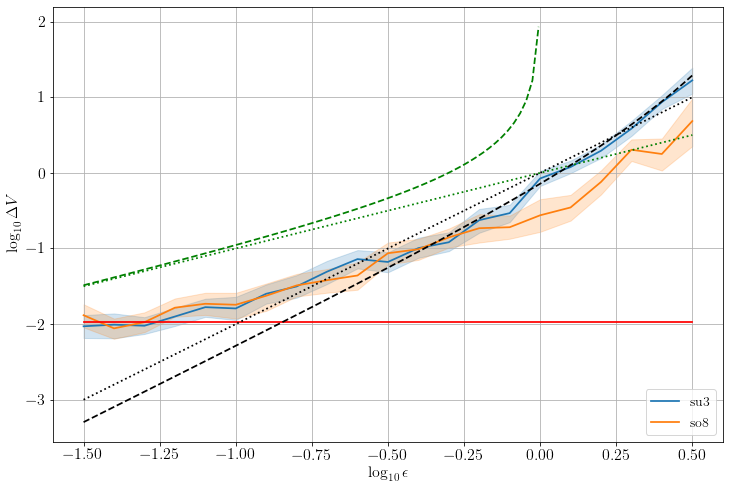

In [ ]:
fig = plt.figure(figsize=(12,8))

transeps=np.column_stack(((np.log10(epses)),(np.log10(np.abs(transVdiffs))),(np.log10(np.abs(rotVdiffs)))))
dfepses = pd.DataFrame(data=transeps, columns=["eps", "su3", "so8"])
sb.lineplot(data=dfepses, x="eps", y="su3")
sb.lineplot(data=dfepses, x="eps", y="so8")
plt.legend(title='', loc='lower right', labels=['su3', 'so8'])
plt.grid()
plt.xlabel(r'$\log_{10}\epsilon$')
plt.ylabel(r'$\log_{10}\Delta V$')

x = np.linspace(-1.5,0.5,100)
lastlossx= np.log10((hist.history)['val_loss'][-1]*0.01)+0*x
plt.plot(x,lastlossx,color="red",linestyle='-',label='loss')

y1 = np.log10(np.exp(10**x)-(1+10**x))
y = np.log10(1/(1-10**x)-(1))
plt.plot(x,y,color="green",linestyle='--',label='resummed above eps')
plt.plot(x,x,color="green",linestyle='dotted',label='eps')
plt.plot(x,y1,color="black",linestyle='--',label='resummed above eps**2')
plt.plot(x,2*x,color="black",linestyle='dotted',label='eps**2')